In [ ]:
!ls

sample_data


In [ ]:
!cd drive 

/bin/bash: line 0: cd: drive: No such file or directory


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
import os
import time
!pip install googlemaps
import googlemaps # pip install googlemaps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40718 sha256=3cf56e2ffed3a1a2922c635ba0f381bb0acc273942079471aad4f40355f93db4
  Stored in directory: /root/.cache/pip/wheels/d9/5f/46/54a2bdb4bcb07d3faba4463d2884865705914cc72a7b8bb5f0
Successfully built googlemaps


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/ca_ev_registrations_public.csv')

<ipython-input-5-635fdc1e6e54>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Dataset/ca_ev_registrations_public.csv')


In [ ]:
df.head()

,Vehicle ID,County GEOID,Registration Valid Date,DMV ID,DMV Snapshot,Registration Expiration Date,State Abbreviation,Geography,Vehicle Name
0,CA-002-03597\r,06099,2011-01-01,2,CA Registration Data from CA (12/31/2011),NaN,CA,County,Chevrolet Volt
1,CA-002-03598\r,06105,2011-01-01,2,CA Registration Data from CA (12/31/2011),NaN,CA,County,Nissan Leaf
2,CA-002-03599\r,06103,2011-01-01,2,CA Registration Data from CA (12/31/2011),NaN,CA,County,Chevrolet Volt
3,CA-002-03600\r,06099,2011-01-01,2,CA Registration Data from CA (12/31/2011),NaN,CA,County,Tesla Roadster
4,CA-002-03601\r,06099,2011-01-01,2,CA Registration Data from CA (12/31/2011),NaN,CA,County,Tesla Roadster


In [ ]:
print(len(df))

2542443


In [ ]:
n = len(pd.unique(df['County GEOID']))

In [ ]:
print(n)

117


In [ ]:
santa_clara = df[df['County GEOID']=='06085']

In [ ]:
santa_clara

,Vehicle ID,County GEOID,Registration Valid Date,DMV ID,DMV Snapshot,Registration Expiration Date,State Abbreviation,Geography,Vehicle Name
145,CA-003-08220\r,06085,2012-01-01,3,CA Registration Data from CA (12/31/2012),NaN,CA,County,Nissan Leaf
146,CA-003-08221\r,06085,2012-01-01,3,CA Registration Data from CA (12/31/2012),NaN,CA,County,Nissan Leaf
147,CA-003-08222\r,06085,2012-01-01,3,CA Registration Data from CA (12/31/2012),NaN,CA,County,Nissan Leaf
148,CA-003-08223\r,06085,2012-01-01,3,CA Registration Data from CA (12/31/2012),NaN,CA,County,Nissan Leaf
149,CA-003-08224\r,06085,2012-01-01,3,CA Registration Data from CA (12/31/2012),NaN,CA,County,Nissan Leaf
...,...,...,...,...,...,...,...,...,...
1463517,CA-010-1450166\r,06085,2019-01-01,10,CA Registration Data from CA (12/31/2019),NaN,CA,County,Ford Fusion Energi
1463518,CA-010-1450167\r,06085,2019-01-01,10,CA Registration Data from CA (12/31/2019),NaN,CA,County,Ford Fusion Energi
1463519,CA-010-1450168\r,06085,2019-01-01,10,CA Registration Data from CA (12/31/2019),NaN,CA,County,Ford Fusion Energi
1463520,CA-010-1450169\r,06085,2019-01-01,10,CA Registration Data from CA (12/31/2019),NaN,CA,County,Ford Fusion Energi


In [ ]:
print(len(santa_clara))

147669


In [ ]:
ADAT = pd.read_csv('/content/drive/MyDrive/Dataset/Average_Daily_Traffic_San_Jose.csv')

In [ ]:
ADAT.head()

,X,Y,OBJECTID,FACILITYID,INTID,LATITUDE,LONGITUDE,COUNTDATE,ADT,STREETONE,DIRECTION,STREETTWO,TRAVELDIRE,NEARINTERS,CITY,ADTONE,ADTTWO,LASTUPDATE,NOTES
0,6126920.199,1926608.795,4918,2520,2520,37.276477,-121.994238,2005/01/04 00:00:00+00,20285.0,Quito Rd,N of,Mccoy Av,,Quito Rd & Mccoy Av,San Jose,NaN,NaN,2021/03/18 17:05:47+00,
1,6126925.617,1926283.345,5093,2695,2695,37.275584,-121.994201,2005/01/04 00:00:00+00,17892.0,Quito Rd,S of,Mccoy Av,,Quito Rd & Mccoy Av,San Jose,NaN,NaN,2021/03/18 17:05:47+00,
2,6139968.886,1939064.121,4959,2561,2561,37.311245,-121.950060,2005/01/05 00:00:00+00,34310.0,Winchester Bl,S of,Neal Av,,Winchester Bl & Neal Av,San Jose,NaN,NaN,2021/03/18 17:05:47+00,
3,6139970.296,1939381.525,4960,2562,2562,37.312116,-121.950072,2005/01/05 00:00:00+00,34238.0,Winchester Bl,N of,Neal Av,,Winchester Bl & Neal Av,San Jose,NaN,NaN,2021/03/18 17:05:47+00,
4,6156228.516,1939090.727,5230,2832,2832,37.311988,-121.894164,2005/01/10 00:00:00+00,12378.0,Willow St,W of,Delmas Av,,Willow St & Delmas Av,San Jose,NaN,NaN,2021/03/18 17:05:47+00,


In [ ]:
ADAT.tail()

,X,Y,OBJECTID,FACILITYID,INTID,LATITUDE,LONGITUDE,COUNTDATE,ADT,STREETONE,DIRECTION,STREETTWO,TRAVELDIRE,NEARINTERS,CITY,ADTONE,ADTTWO,LASTUPDATE,NOTES
2394,6171081.379,1954917.494,7282,4474,4474,37.356051,-121.843873,2021/12/02 00:00:00+00,1207.0,Scharff Ave,N of,Lausett Ave,N/S,Scharff Ave & Lausett Ave,San Jose,656.0,551.0,2022/04/14 20:14:37+00,NaN
2395,6164262.808,1950130.677,7283,4475,4475,37.342634,-121.867090,2021/12/02 00:00:00+00,3068.0,San Antonio St,E of,21st St,E/W,San Antonio St & 21st St,San Jose,1521.0,1547.0,2022/04/14 20:14:37+00,NaN
2396,6164838.516,1950567.683,7284,4476,4476,37.343858,-121.865132,2021/12/02 00:00:00+00,4238.0,San Antonio St,E of,23rd St,E/W,San Antonio St & 23rd St,San Jose,2305.0,1933.0,2022/04/14 20:14:37+00,NaN
2397,6163788.484,1949770.831,7285,4477,4477,37.341627,-121.868703,2021/12/02 00:00:00+00,2395.0,San Antonio St,E of,19th St,E/W,San Antonio St & 19th St,San Jose,1156.0,1239.0,2022/04/14 20:14:37+00,NaN
2398,6165823.997,1949792.473,7268,4460,4460,37.341768,-121.861703,2021/12/08 00:00:00+00,3925.0,William Ct,E of,24th St,E/W,William Ct & 24th St,San Jose,1898.0,2027.0,2022/04/14 20:14:36+00,NaN


In [ ]:
current_charger = pd.read_csv('/content/drive/MyDrive/Dataset/charger_loc_details.csv')

In [ ]:
current_charger.head()

,Unnamed: 0,Name,ID,Vicinity,latitude,longitude,Rating,Url,Food,Sport,Shopping mall,Bank,School,University,Hospital,Parks,Building,Shops,Bus stop,Worship
0,0,EV Connect Charging Station,ChIJq6o6MSEzjoARjvRfoyAz4Pc,"1790 S 10th St, San Jose",37.314067,-121.860109,0.0,https://www.google.com/maps/place/?q=place_id:...,40,0,0,0,0,0,0,0,0,38,40,0
1,1,Tesla Supercharger,ChIJg_KB-__Lj4ARKxcCo2ycXnE,"533 Coleman Ave, San Jose",37.339563,-121.903660,4.6,https://www.google.com/maps/place/?q=place_id:...,40,0,0,25,9,0,0,6,0,40,40,0
2,2,Electrify America Charging Station,ChIJcRQc0NHNj4ARKPDmsvqIPYI,"2300 Alum Rock Ave, San Jose",37.358177,-121.842699,4.2,https://www.google.com/maps/place/?q=place_id:...,31,0,0,0,0,0,0,0,0,37,40,0
3,3,ChargePoint Charging Station,ChIJL5RnrbvMj4ARhS8mdo8lmrc,"280 S Second St, San Jose",37.332490,-121.886242,0.0,https://www.google.com/maps/place/?q=place_id:...,40,0,0,14,9,0,0,7,0,40,40,0
4,4,EV Connect Charging Station,ChIJ__-r3HrMj4ARd3Jd3MFgiJk,"1202 Old Oakland Rd, San Jose",37.365814,-121.891503,0.0,https://www.google.com/maps/place/?q=place_id:...,34,0,0,0,0,0,0,0,0,31,39,0


## Finding the nearest traffic points

### Haversine Distance Equation

In [ ]:
from math import radians, cos, sin, asin, sqrt
from heapq import nsmallest,heapify, heappush, heappop
def dist(lat1, long1, lat2, long2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
    # haversine formula 
    dlon = long2 - long1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [ ]:
def find_nearest(lat, long):
    distances = ADAT.apply(
        lambda row: dist(lat, long, row['LATITUDE'], row['LONGITUDE']), axis=1)
    heap = []
    heapify(heap)
    for i,j in enumerate(distances):
      heappush(heap, [j,i])
    z1 = heap[0][1]
    heappop(heap)
    z2 = heap[0][1]
    heappop(heap)
    z3 = heap[0][1]
    heappop(heap)
    z4 = heap[0][1]
    heappop(heap)
    #print(z1,z2,z3)
    a1 = ADAT.loc[z1, 'ADT']
    a2 = ADAT.loc[z2, 'ADT']
    a3 = ADAT.loc[z3, 'ADT']
    a4 = ADAT.loc[z4, 'ADT']
    #print(a1,a2,a3)
    return a1+a2+a3+a4/4

In [ ]:
current_charger['Average_AADT'] = current_charger.apply(
    lambda row: find_nearest(row['latitude'], row['longitude']), 
    axis=1)

current_charger.head()

,Unnamed: 0,Name,ID,Vicinity,latitude,longitude,Rating,Url,Food,Sport,...,Bank,School,University,Hospital,Parks,Building,Shops,Bus stop,Worship,Average_AADT
0,0,EV Connect Charging Station,ChIJq6o6MSEzjoARjvRfoyAz4Pc,"1790 S 10th St, San Jose",37.314067,-121.860109,0.0,https://www.google.com/maps/place/?q=place_id:...,40,0,...,0,0,0,0,0,0,38,40,0,59780.00
1,1,Tesla Supercharger,ChIJg_KB-__Lj4ARKxcCo2ycXnE,"533 Coleman Ave, San Jose",37.339563,-121.903660,4.6,https://www.google.com/maps/place/?q=place_id:...,40,0,...,25,9,0,0,6,0,40,40,0,30932.50
2,2,Electrify America Charging Station,ChIJcRQc0NHNj4ARKPDmsvqIPYI,"2300 Alum Rock Ave, San Jose",37.358177,-121.842699,4.2,https://www.google.com/maps/place/?q=place_id:...,31,0,...,0,0,0,0,0,0,37,40,0,35143.25
3,3,ChargePoint Charging Station,ChIJL5RnrbvMj4ARhS8mdo8lmrc,"280 S Second St, San Jose",37.332490,-121.886242,0.0,https://www.google.com/maps/place/?q=place_id:...,40,0,...,14,9,0,0,7,0,40,40,0,35227.50
4,4,EV Connect Charging Station,ChIJ__-r3HrMj4ARd3Jd3MFgiJk,"1202 Old Oakland Rd, San Jose",37.365814,-121.891503,0.0,https://www.google.com/maps/place/?q=place_id:...,34,0,...,0,0,0,0,0,0,31,39,0,92444.25


In [ ]:
current_charger.tail()

,Unnamed: 0,Name,ID,Vicinity,latitude,longitude,Rating,Url,Food,Sport,...,Bank,School,University,Hospital,Parks,Building,Shops,Bus stop,Worship,Average_AADT
55,55,ChargePoint Charging Station,ChIJVaz6dr3Mj4ARoF_Gp9WBdRQ,"50 N 4th St, San Jose",37.338968,-121.887793,0.0,https://www.google.com/maps/place/?q=place_id:...,40,0,...,25,9,0,0,5,0,40,40,0,18341.75
56,56,ChargePoint Charging Station,ChIJH1ZMErzMj4ARbIKOpEM2Yow,"52 S 4th St, San Jose",37.336444,-121.885893,5.0,https://www.google.com/maps/place/?q=place_id:...,40,0,...,18,10,0,0,5,0,40,40,0,32547.25
57,57,ChargePoint Charging Station,ChIJgzJITffMj4ARA1QflVMuzMg,"1608 Las Plumas Ave, San Jose",37.360110,-121.868455,4.0,https://www.google.com/maps/place/?q=place_id:...,32,0,...,0,0,0,0,0,0,40,40,0,56883.00
58,58,ChargePoint Charging Station,ChIJp5Adc5PLj4ARSbIOnSKGLgU,"1740 Technology Dr, San Jose",37.367471,-121.917563,0.0,https://www.google.com/maps/place/?q=place_id:...,40,0,...,0,0,0,0,0,0,32,36,0,31714.25
59,59,ChargePoint Charging Station,ChIJrynn8ZHLj4ARXnQuVd51_NM,"1650 Technology Dr, San Jose",37.364779,-121.913917,0.0,https://www.google.com/maps/place/?q=place_id:...,28,0,...,0,0,0,0,0,0,32,34,0,50313.75


In [ ]:
#3789260

In [ ]:
average_aadt = current_charger['Average_AADT']

In [ ]:
import math
sum_aadt = 0
for i in average_aadt:
  if math.isnan(i):
    continue
  sum_aadt+=i

In [ ]:
sum_aadt

2618728.0

In [ ]:
def Energy_Use(aadt):
  return (aadt/sum_aadt)*3789260

In [ ]:
current_charger['Energy_Consumption'] = current_charger.apply(
    lambda row: Energy_Use(row['Average_AADT']), axis=1)
# To check the data frame if it has a new column of hotel name (for each and every member's location in the list)
current_charger.head()

,Unnamed: 0,Name,ID,Vicinity,latitude,longitude,Rating,Url,Food,Sport,...,School,University,Hospital,Parks,Building,Shops,Bus stop,Worship,Average_AADT,Energy_Consumption
0,0,EV Connect Charging Station,ChIJq6o6MSEzjoARjvRfoyAz4Pc,"1790 S 10th St, San Jose",37.314067,-121.860109,0.0,https://www.google.com/maps/place/?q=place_id:...,40,0,...,0,0,0,0,0,38,40,0,59780.00,86500.760216
1,1,Tesla Supercharger,ChIJg_KB-__Lj4ARKxcCo2ycXnE,"533 Coleman Ave, San Jose",37.339563,-121.903660,4.6,https://www.google.com/maps/place/?q=place_id:...,40,0,...,9,0,0,6,0,40,40,0,30932.50,44758.861917
2,2,Electrify America Charging Station,ChIJcRQc0NHNj4ARKPDmsvqIPYI,"2300 Alum Rock Ave, San Jose",37.358177,-121.842699,4.2,https://www.google.com/maps/place/?q=place_id:...,31,0,...,0,0,0,0,0,37,40,0,35143.25,50851.753788
3,3,ChargePoint Charging Station,ChIJL5RnrbvMj4ARhS8mdo8lmrc,"280 S Second St, San Jose",37.332490,-121.886242,0.0,https://www.google.com/maps/place/?q=place_id:...,40,0,...,9,0,0,7,0,40,40,0,35227.50,50973.662270
4,4,EV Connect Charging Station,ChIJ__-r3HrMj4ARd3Jd3MFgiJk,"1202 Old Oakland Rd, San Jose",37.365814,-121.891503,0.0,https://www.google.com/maps/place/?q=place_id:...,34,0,...,0,0,0,0,0,31,39,0,92444.25,133765.438318


In [ ]:
data = current_charger.drop(['Name','latitude', 'longitude', 'ID', 'Vicinity', 'Unnamed: 0','Rating','Url'], axis=1)

In [ ]:
data = data[data['Average_AADT'].notna()]

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['Energy_Consumption'], axis=1)
y = data['Energy_Consumption']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=89)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressorB
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

def gboost(X_train, y_train):
    boost = GradientBoostingRegressor()
    boost.fit(X_train, y_train)
    return boost

def randforest(X_train, y_train):
    forest = RandomForestRegressor()
    forest.fit(X_train, y_train)
    return forest

def bagreg(X_train, y_train):
    bag = BaggingRegressor()
    bag.fit(X_train, y_train)
    return bag

boost = gboost(X_train, y_train)
print('Gradient Boosting: ' + str(boost.score(X_test, y_test)))

forest = randforest(X_train, y_train)
print('Random Forest: ' + str(forest.score(X_test, y_test)))

bag = bagreg(X_train, y_train)
print('Bagging: ' + str(bag.score(X_test, y_test)))

Gradient Boosting: 0.9943523060071883
Random Forest: 0.9809808001068296
Bagging: 0.9894469248530722


Text(0.5, 1.0, 'Feature Importance (MDI)')

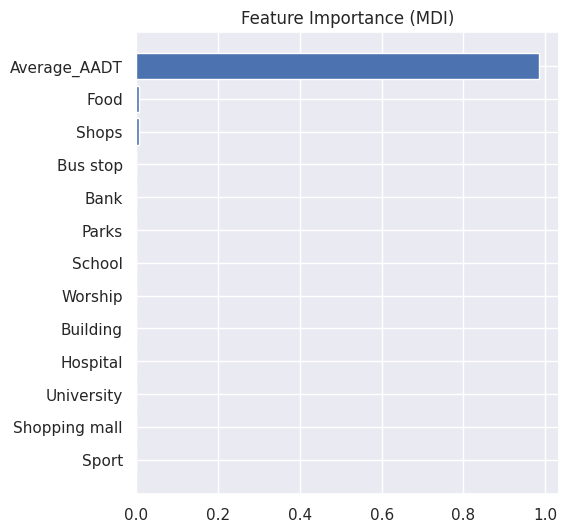

In [ ]:
feature_importance = boost.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

# Reinforcement Learning

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pickle
from matplotlib import style 
import time 
import math

In [ ]:
from copy import copy, deepcopy

HM_EPISODES = 15000 # num of total episodes (used 50000 episodes during actual training)
SHOW_EVERY = 1000 # display data every 1000 episodes
SIZE = 26
epsilon = 0.9
EPS_DECAY = 0.99999
place_prob = 0.8 # decreases the chance that the agent will place a station when picking a random action based on epsilon
DEMAND_DECREASE = 0.5 # after placing a station, attractiveness at that point goes down
TOTAL_PLACEMENTS = 10 # total num of chargers to place down
grid = deepcopy(new_data)

start_q_table = None
LEARNING_RATE = 0.1 
DISCOUNT = 0.95 # discount factor for Q-learning

NameError: ignored